In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [15]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [16]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [17]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_train.isnull().mean()

Age       0.203652
Fare      0.051966
Family    0.000000
dtype: float64

##### Using Pandas:

In [20]:
Age_mean = X_train['Age'].mean()
Age_median = X_train['Age'].median()

Fare_mean = X_train['Fare'].mean()
Fare_median = X_train['Fare'].median()

X_train['Age_mean'] = X_train['Age'].fillna(Age_mean)
X_train['Age_median'] = X_train['Age'].fillna(Age_median)

X_train['Fare_mean'] = X_train['Fare'].fillna(Fare_mean)
X_train['Fare_median'] = X_train['Fare'].fillna(Fare_median)
X_train.sample(5)



,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
470,NaN,7.2500,0,29.463263,28.0,7.2500,7.2500
261,3.0,31.3875,6,3.000000,3.0,31.3875,31.3875
714,52.0,13.0000,0,52.000000,52.0,13.0000,13.0000
413,NaN,0.0000,0,29.463263,28.0,0.0000,0.0000
678,43.0,46.9000,7,43.000000,43.0,46.9000,46.9000


In [21]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  201.46939799265846
Age Variance after median imputation:  160.72984184148714
Age Variance after mean imputation:  160.38210866926116
Original Fare variable variance:  2809.9324507651977
Fare Variance after median imputation:  2681.4462852221927
Fare Variance after mean imputation:  2663.7053049447873


as we can see above there is not much difference in the variance of Fare but in the variance of age that is because there were more missing values in Age and this is why we do not use mean median imputation in columns having more than 5% of missing values.

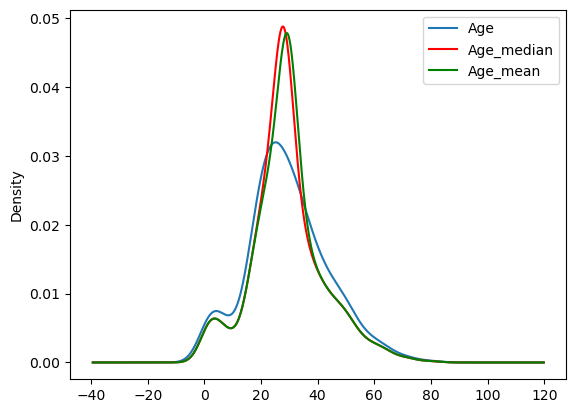

In [22]:

ax = plt.subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
plt.legend()

here above there is a large difference seen which is a red flag

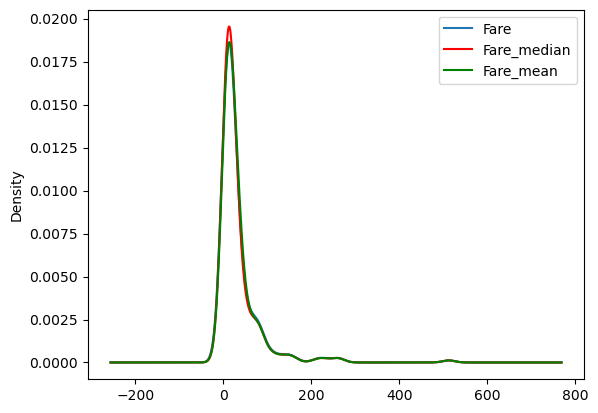

In [23]:

ax = plt.subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
plt.legend()

in above plot there is very slight difference which is a green flag 

In [24]:
# we should also check the correlation between the columns:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.115712,-0.290705,1.000000,1.000000,0.113056,0.113633
Fare,0.115712,1.000000,0.203753,0.110170,0.115170,1.000000,1.000000
Family,-0.290705,0.203753,1.000000,-0.241169,-0.237888,0.200275,0.199162
Age_mean,1.000000,0.110170,-0.241169,1.000000,0.998918,0.107490,0.108142
Age_median,1.000000,0.115170,-0.237888,0.998918,1.000000,0.112378,0.112803
Fare_mean,0.113056,1.000000,0.200275,0.107490,0.112378,1.000000,0.996686
Fare_median,0.113633,1.000000,0.199162,0.108142,0.112803,0.996686,1.000000


In [25]:
# correlation doesn't show much change since its value lies between -1 to 1 that's why check covariance
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,201.469398,93.581181,-6.109695,201.469398,201.469398,88.255524,89.086006
Fare,93.581181,2809.932451,17.363844,74.113689,77.567985,2809.932451,2809.932451
Family,-6.109695,17.363844,2.535904,-4.863695,-4.802711,16.460240,16.423156
Age_mean,201.469398,74.113689,-4.863695,160.382109,160.382109,70.256859,70.917974
Age_median,201.469398,77.567985,-4.802711,160.382109,160.729842,73.531395,74.054546
Fare_mean,88.255524,2809.932451,16.460240,70.256859,73.531395,2663.705305,2663.705305
Fare_median,89.086006,2809.932451,16.423156,70.917974,74.054546,2663.705305,2681.446285


##### Using SkLearn: 

In [26]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size= 0.2)
trf = ColumnTransformer([
    ('impute', SimpleImputer(strategy= 'mean'), ['Age']),
    ('impute_1', SimpleImputer(strategy= 'median'), ['Fare'])
], remainder= 'passthrough')
trf.fit_transform(X_train1)
trf.transform(X_test1)
X_train1

,Age,Fare,Family
615,24.0,65.0000,3
504,16.0,86.5000,0
100,28.0,7.8958,0
855,18.0,9.3500,1
201,NaN,69.5500,10
...,...,...,...
529,23.0,11.5000,3
20,35.0,26.0000,0
807,18.0,7.7750,0
264,NaN,7.7500,0
